HSV:  [ 60.851075 217.2455   184.412925]


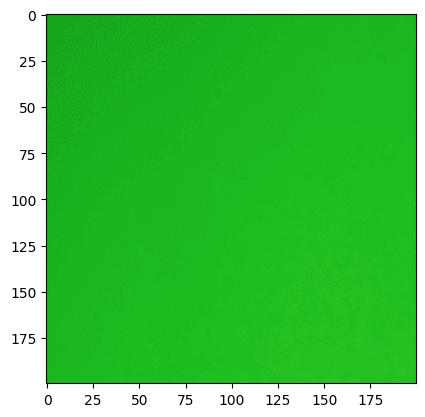

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

input_image = cv2.imread("images/green.png")
croped_region = input_image[:200,:200,:]
plt.imshow(croped_region[...,::-1])

hsv = cv2.cvtColor(croped_region, cv2.COLOR_BGR2HSV)
print("HSV: ", np.mean(hsv, axis=(0,1)))

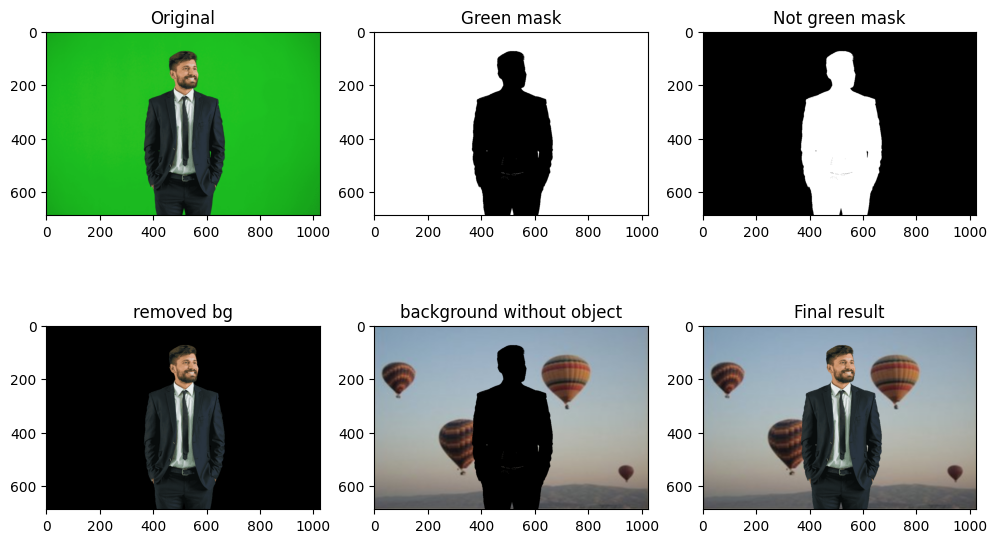

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

input_image = cv2.imread("images/green.png")
bg_image = cv2.imread("images/balloon.png")
hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

h, w, _ =input_image.shape
bg_image = cv2.resize(bg_image,(w, h))
l_green = np.array([50, 50, 50])
u_green = np.array([70, 255, 255])

mask = cv2.inRange(hsv, l_green, u_green)
mask_not_green = cv2.bitwise_not(mask)

new_bg = cv2.bitwise_and(bg_image, bg_image, mask=mask)
removed_bg = cv2.bitwise_and(input_image, input_image, mask=mask_not_green)

final = cv2.add(removed_bg, new_bg)

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(mask, cmap='gray');plt.title("Green mask");
plt.subplot(233);plt.imshow(mask_not_green, cmap='gray');plt.title("Not green mask");
#second row
plt.subplot(234);plt.imshow(removed_bg[...,::-1]);plt.title("removed bg");
plt.subplot(235);plt.imshow(new_bg[...,::-1]);plt.title("background without object");
plt.subplot(236);plt.imshow(final[...,::-1]);plt.title("Final result");